In [96]:
import numpy as np
import matplotlib.pyplot as plt


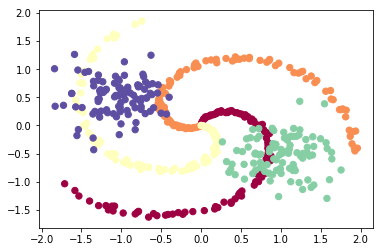

In [97]:
N = 100 #number of point each class
D = 2 #dimension input
K = 5 #number of class
X = np.zeros((N*K, D)) #input
y = np.zeros(N*K, dtype='uint8') #target

for j in range(K-2):
    ix = range(N*j, N*(j+1))
    r = np.linspace(0.,1,N) #radius
    t = np.linspace(j*4, (j+1)*4, N) + np.random.rand(N)*.2 #theta
    X[ix] = 2*np.c_[r*np.sin(t), r*np.cos(t)]
    y[ix] = j
# for j in range(K-2, K):
means = [[1, -.5], [-1, .5]]
cov = [[0.1, 0], [0, .1]]
# ix = range(N*j, N*(j+1))
X4 = np.random.multivariate_normal(means[0], cov, N)
X5 = np.random.multivariate_normal(means[1], cov, N)
for j in range(K-2, K):
    ix = range(N*j, N*(j+1))
#     X[ix] = X4
    X[ix] = np.random.multivariate_normal(means[j-(K-2)], cov, N)
    y[ix] = j

fig = plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
# plt.axis([-2, 2, -2, 2])

In [98]:
print(X[2])
print(y[2])
print(X.shape, y.shape)
N = N*K #num of input

[0.00513996 0.04007577]
0
(500, 2) (500,)


In [99]:
d1 = 100 #unit of hidden

W1 = .01*np.random.rand(D, d1)
b1 = np.zeros((1, d1))
W2 = .01*np.random.rand(d1, K)
b2 = np.zeros((1, K))

lr = 1
ite = 10000

def softmax(V):
    e_V = np.exp(V - np.max(V, axis=0, keepdims=True))
    z = e_V / e_V.sum(axis=0)
    return z
    
def cost(y_pred, y):
    return -np.sum(y*np.log(y_pred)) / y.shape[0]

In [100]:

for it in range(ite):
    #feedforward
    z1 = np.dot(X, W1) + b1 #N*d1
    a1 = np.maximum(0, z1)
    z2 = np.dot(a1, W2) + b2 #N*K
#     y_pred = softmax(z2)

    #predict
    e_y = np.exp(z2)
    y_pred = e_y / np.sum(e_y, axis=1, keepdims=True) #N*K
#     print(y_pred[0])
    
    #loss
    correct_log = -np.log(y_pred[range(N), y])
    loss = np.sum(correct_log) / N
    if it%1000 == 0:
        print('Iter:{0}, Loss:{1}'.format(it, loss))

        
    #backpropagation
    dz2 = y_pred
    dz2[range(N), y] -= 1 #y_pred - y (tai vi tri y=1)
    dz2 /= N #N*K
    
    dW2 = np.dot(a1.T, dz2) #d1*K
    db2 = np.sum(dz2, axis=0, keepdims=True) #1*K
    
    dz1 = np.dot(dz2, W2.T) #N*d1
    dz1[z1<=0] = 0 #ReLU
    
    dW1 = np.dot(X.T, dz1)
    db1 = np.sum(dz1, axis=0, keepdims=True)
    
    #update
    W1 -= lr*dW1
    b1 -= lr*db1
    W2 -= lr*dW2
    b2 -= lr*db2
    
z1 = np.dot(X, W1) + b1 #N*d1
a1 = np.maximum(0, z1)
z2 = np.dot(a1, W2) + b2 #N*K
e_y = np.exp(z2)
y_pred = e_y / np.sum(e_y, axis=1, keepdims=True)
# print(np.argmax(y_pred, axis=1))
        

Iter:0, Loss:1.6094898900548198
Iter:1000, Loss:0.44320488178888584
Iter:2000, Loss:0.3376691115986712
Iter:3000, Loss:0.31558515644615404
Iter:4000, Loss:0.30207578383548744
Iter:5000, Loss:0.27823742316209193
Iter:6000, Loss:0.24665365283864485
Iter:7000, Loss:0.22498181250424926
Iter:8000, Loss:0.21217150654821668
Iter:9000, Loss:0.20632401568275321


In [101]:
z1 = np.dot(X, W1) + b1 #N*d1
a1 = np.maximum(0, z1)
z2 = np.dot(a1, W2) + b2 #N*K
e_y = np.exp(z2)
y_pred = e_y / np.sum(e_y, axis=1, keepdims=True)
pred_class = np.argmax(y_pred, axis=1)
print('Accuracy: %.2f '%(100*np.mean(pred_class == y)))

Accuracy: 90.20 


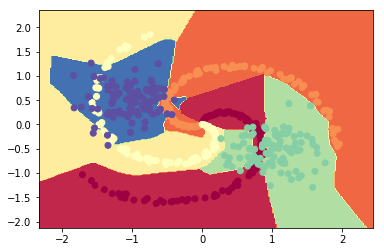

In [102]:
h = .02
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
z = np.dot(np.maximum(0, np.dot(np.c_[xx.ravel(), yy.ravel()], W1) + b1), W2) + b2
z = np.argmax(z, axis=1)
z = z.reshape(xx.shape)
fig = plt.figure()
plt.contourf(xx, yy, z, cmap=plt.cm.Spectral)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)
